In [1]:
from functions import Dataset, import_data, widgety, clicked, wybierz_zmienne, prognozy

from wykresy import kolizje_miesiac, kolizje_rok_dzien, kolizje_doba
from symulacje import srednia_miesiac, testSrednich_bootstrap, prawdopodobienstwo

from testy import dwie_srednie

import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import numpy as np

import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
print(Dataset())

Nasza aplikacja z kolizjami jest w trakcie budowy


### Pobranie danych, utworzenie df i zmiennych

In [3]:
df = import_data(Dataset.kolizje)
df_box, lata, wybor, wskaznik, cecha, button = widgety(df)

Wyciągnięcie i dostosowanie danych chwilę trwa, zrelaksuj się i czekaj na komunikat o zakończeniu
Dane gotowe - możesz robić analizy


In [4]:
df_prognozy = prognozy(df)

KeyError: 'data'

### WYKRES SKRZYNKOWY

Analiza BEZ obserwacji odstających
Analiza lat 2004 - 2020


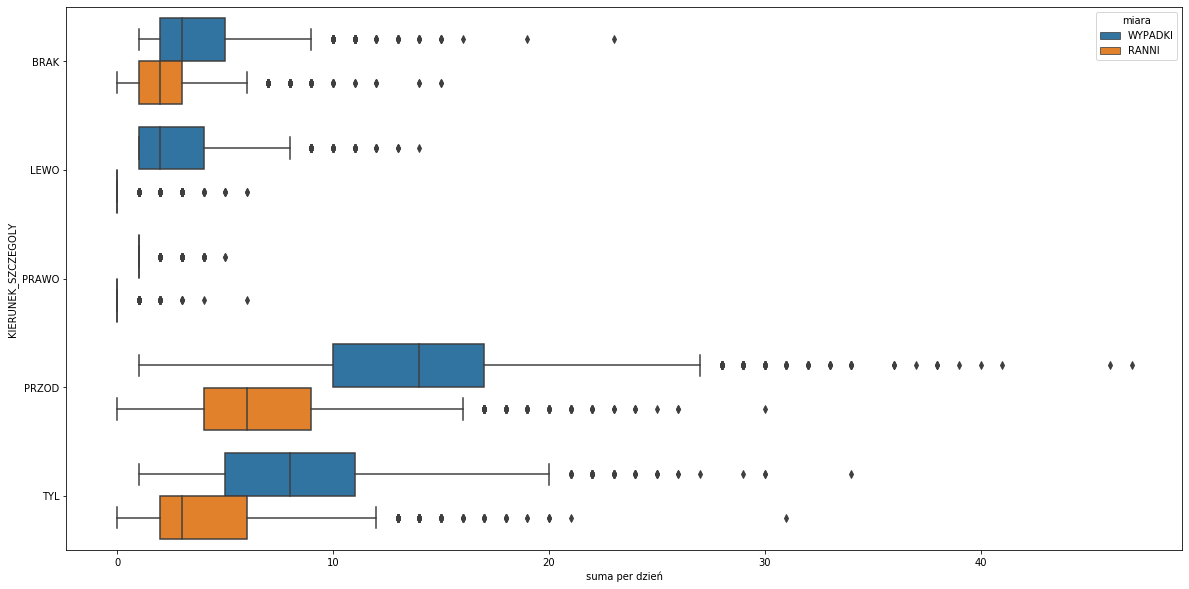

In [5]:
button.on_click(clicked)
wybierz_zmienne(lata, wybor, wskaznik, cecha, button)

### Test średnich

In [6]:
dwie_srednie(dane=df, cecha='ROK', grupa1 = 2007, grupa2 = 2017, wartosc='SMIERTELNIE_RANNI', alpha=0.01, obszar='lewy')

Odrzucamy hipotezę zerową na rzecz alternatywnej 
U=-2.5676601367133123<=-2.3263478740408408=u_alpha 
m1=0.0010331340860453102
m2=0.0027037466203167246 
p_value=0.005119374287263001


### Wykres ilości kolizji na miesiąc

In [7]:
kolizje_miesiac(df_prognozy)

NameError: name 'df_prognozy' is not defined

### Diagram kolizji w danym roku i dniu tygodnia

In [8]:
kolizje_rok_dzien(df_prognozy)

NameError: name 'df_prognozy' is not defined

### Wykres kolizji w ciągu doby

In [9]:
kolizje_doba(df_prognozy)

NameError: name 'df_prognozy' is not defined

### Porównanie średnich ilości kolizji w danych miesiącach.
### Wykorzystanie symulacji Monte Carlo do zwiększenia wiarygodności testu statystycznego.

In [10]:
srednia_miesiac(df_prognozy)

NameError: name 'df_prognozy' is not defined

In [11]:
testSrednich_bootstrap(df_prognozy, nr_miesiacaA = 6, nr_miesiacaB = 7, n=1000, alpha=0.05)

NameError: name 'df_prognozy' is not defined

### Prawdopodobieństwo kolizji w danym miesjcu Seattle

In [12]:
lista = widgets.Dropdown(
    options=[((47.635942953663616, -122.3141684559052), 2.00), ((47.62717616648498, -122.35211871192145), 1.75), ((47.71717310092632, -122.34489607877191), 1.13)],
    value=2,
    description='Miejsce:')
display(lista)

Dropdown(description='Miejsce:', options=(((47.635942953663616, -122.3141684559052), 2.0), ((47.62717616648498…

In [13]:
prawdopodobienstwo(k=0, mu=lista.value)

Prawdopodpbieństwo, że w następnym tygodniu nie będzie kolizji w danym miejscu: 0.1353352832366127
Prawdopodobieństwo, że będą dokładnie 2 kolizje w następnym tygodniu: 0.2706705664732254
Prawdopodobieństwo, że będą maksymalnie 2 kolizje w następnym tygodniu: 0.6766764161830635
Prawdopodobieńśtwo, że w ciągu następnych 2 tygodni będą przynajmniej 2 kolizje: 0.9084218055563291
